In [ ]:
#Start Assignment 4

Problem Statement 1: The data (sample) were collected in São Paulo — Brazil, in a university, where there are some parties with groups of students from 18 to 28 years of age(average). 

The dataset used for this activity has 7 attributes, being a Target, with a period of one year. You have to predict the quantity of beer consumption based on the features that contain climate conditions.

Dataset Description:
I.Data: date of the record
II.Temperatura Media (C): Average temperature of the day in celsius
III.Temperatura Minima (C): Minimum temperature of the day in celsius
IV.TemperaturaMaxima (C): Maximum temperature of the day in celsius
V.Precipitacao (mm): Percipitation in mm
VI.Final de Semana: If the day is the weekend or not
VII.Consumo de cerveja (litros): Beer consumption in liters

Write a Python code to perform the following tasks mentioned:
1.Load the dataset, check its shape
2.Rectify the data of the first four columns Hint:Check columns 'Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', and 'Precipitac’
Fix the following errors present in these features
3.Create new features using the 'Data' feature and the make 'Data' column as index
Hint:Create a new feature 'Month' from the dates, consisting of the month of the year.Create a new feature 'Day' from the dates, consisting of the day of the week.Set values from the 'Data' column as indexes. Use code snippet:df1.set_index('Data',inplace=True)
4.Handle null and duplicate values 
5.Check the data typeof the features and convert them to the appropriate data type 
6.Analyze features with outlier values  
7.Plot and analyze the correlation 
8.Split the dataset for training and testing 
9.Train a linear regression model and print the intercept and coefficients 
10.Evaluate the model using the R2 score, mean absolute error, and root mean squared error 


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Load the dataset
consumption_df=pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\Consumo_cerveja.csv")
consumption_df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [59]:
# Delete all rows with column 'Data' having null values
indexDate = consumption_df[consumption_df['Data'].isnull()].index
consumption_df.drop(indexDate , inplace=True)
consumption_df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [60]:
#Check the shape
consumption_df.shape

(365, 7)

In [61]:
consumption_df.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [62]:
#Create a new feature 'Month' from the dates, consisting of the month of the year.
#Create a new feature 'Day' from the dates, consisting of the day of the week.

consumption_df['Data'] = pd.to_datetime(consumption_df['Data'],infer_datetime_format=True)

consumption_df['Month'] = pd.DatetimeIndex(consumption_df['Data']).month
consumption_df['Day'] = pd.DatetimeIndex(consumption_df['Data']).day

consumption_df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461,1,1
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972,1,2
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814,1,3
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799,1,4
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900,1,5
...,...,...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307,12,27
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095,12,28
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309,12,29
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467,12,30


In [63]:
#Set values from the 'Data' column as indexes

consumption_df.set_index('Data', inplace=True)
consumption_df

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
Data,,,,,,,,
2015-01-01,"27,3","23,9","32,5",0,0.0,25.461,1,1
2015-01-02,"27,02","24,5","33,5",0,0.0,28.972,1,2
2015-01-03,"24,82","22,4","29,9",0,1.0,30.814,1,3
2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799,1,4
2015-01-05,"23,82",21,"28,3",0,0.0,28.900,1,5
...,...,...,...,...,...,...,...,...
2015-12-27,24,"21,1","28,2","13,6",1.0,32.307,12,27
2015-12-28,"22,64","21,1","26,7",0,0.0,26.095,12,28
2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309,12,29


In [64]:
#Check for null
consumption_df.isnull().sum()

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
Month                          0
Day                            0
dtype: int64

In [65]:
#Check for duplicates
consumption_df.duplicated().sum()

0

In [66]:
#Check the data type of the features and convert them to the appropriate data type

consumption_df.dtypes


Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
Month                            int32
Day                              int32
dtype: object

In [67]:
consumption_df['Temperatura Media (C)'] = pd.to_numeric(consumption_df['Temperatura Media (C)'].str.replace(',','.'))
consumption_df['Temperatura Minima (C)'] = pd.to_numeric(consumption_df['Temperatura Minima (C)'].str.replace(',','.'))
consumption_df['Temperatura Maxima (C)'] = pd.to_numeric(consumption_df['Temperatura Maxima (C)'].str.replace(',','.'))
consumption_df['Precipitacao (mm)'] = pd.to_numeric(consumption_df['Precipitacao (mm)'].str.replace(',','.'))

In [37]:
#consumption_df['Final de Semana'].replace(to_replace=0.0,value=False,inplace=True)
#consumption_df['Final de Semana'].replace(to_replace=1.0,value=True,inplace=True)

In [68]:
consumption_df.dtypes

Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                float64
Consumo de cerveja (litros)    float64
Month                            int32
Day                              int32
dtype: object

In [69]:
#Analyze features with outlier values

#Before we do the graphical EDA, lets separate Numerical and categorical variables(if any) for easy analysis

import numpy as np

cat_cols = consumption_df.select_dtypes(include=['object']).columns.tolist()
num_cols = consumption_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
[]
Numerical Variables:
['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana', 'Consumo de cerveja (litros)', 'Month', 'Day']


Temperatura Media (C)


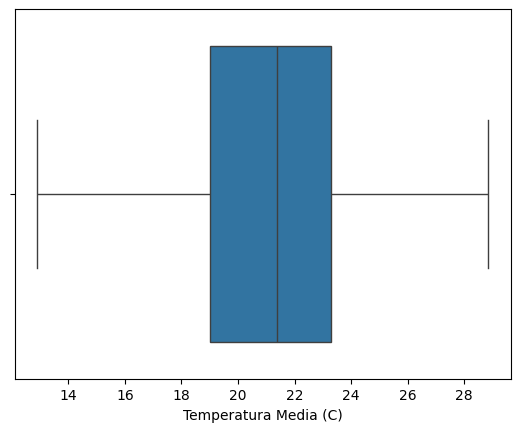

Temperatura Minima (C)


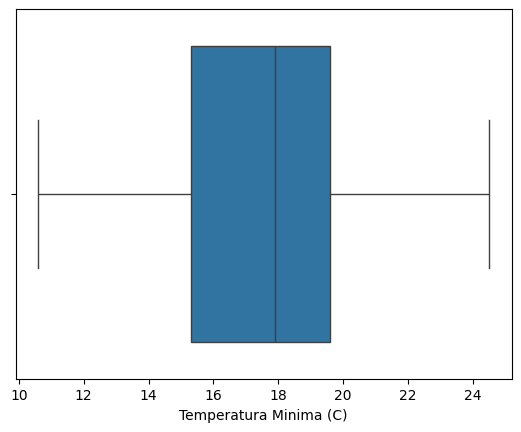

Temperatura Maxima (C)


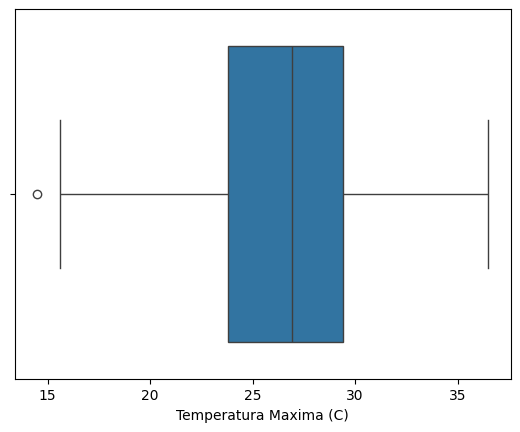

Precipitacao (mm)


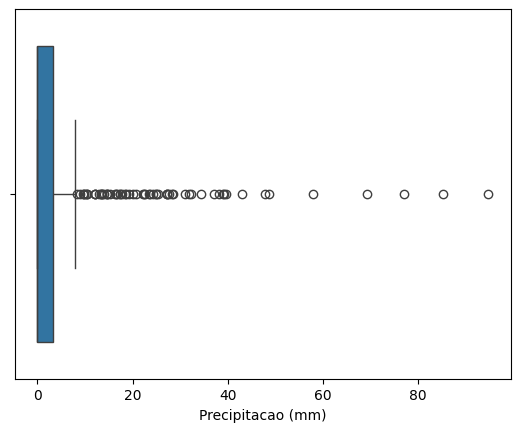

Final de Semana


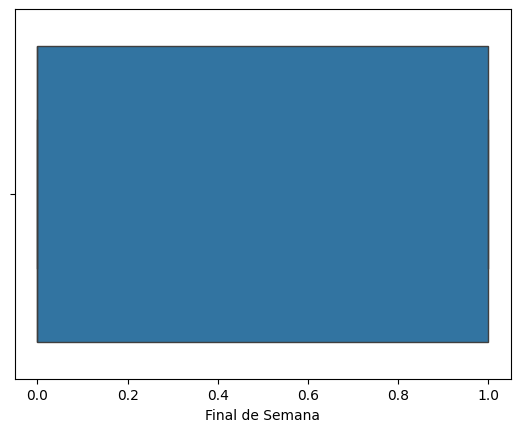

Consumo de cerveja (litros)


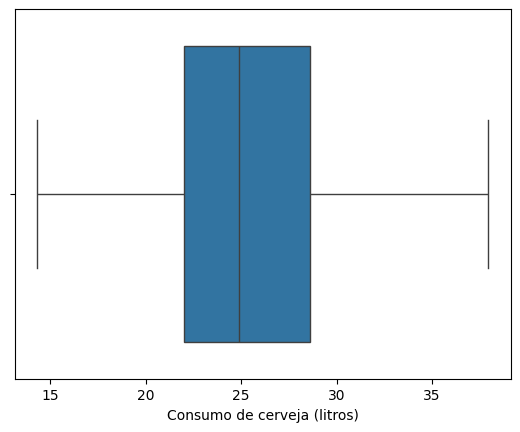

Month


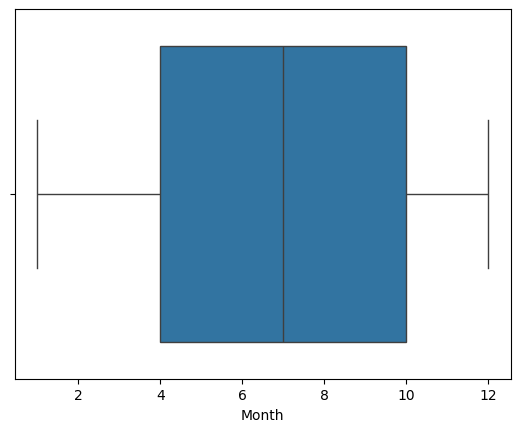

Day


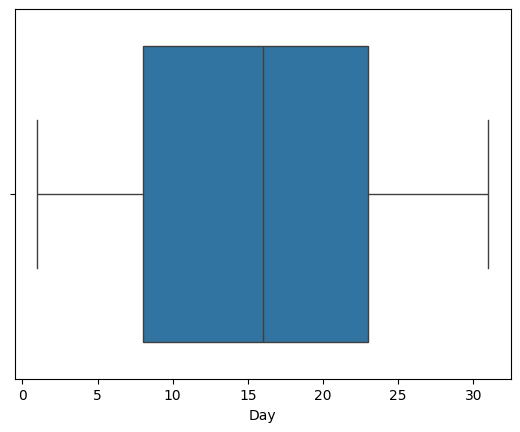

In [70]:
for col in num_cols:
    print(col)
    sns.boxplot(x=consumption_df[col])
    plt.show()

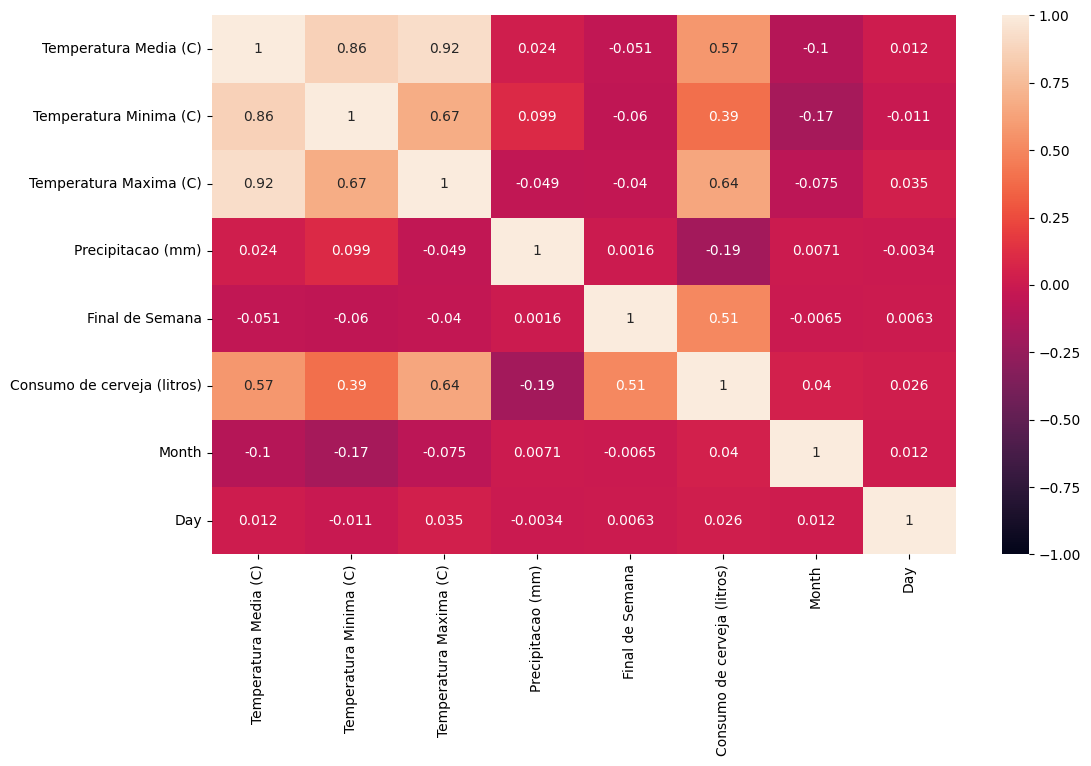

In [71]:
#Plot and analyze the correlation

plt.figure(figsize=(12, 7))
sns.heatmap(consumption_df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [72]:
#Split the dataset for training and testing

x = consumption_df.drop("Consumo de cerveja (litros)",axis=1)
y = consumption_df["Consumo de cerveja (litros)"]

In [73]:
print("Shape of x:",x.shape)
print("Shape of y:",y.shape)

Shape of x: (365, 7)
Shape of y: (365,)


In [74]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [75]:
print("Shape of train dataset features")
print(x_train.shape)
print("Shape of test dataset features")
print(x_test.shape)
print("Shape of train dataset target")
print(y_train.shape)
print("Shape of test dataset target")
print(y_test.shape)

Shape of train dataset features
(292, 7)
Shape of test dataset features
(73, 7)
Shape of train dataset target
(292,)
Shape of test dataset target
(73,)


In [76]:
#Train a linear regression model and print the intercept and coefficients

from sklearn.linear_model import LinearRegression

model_linreg = LinearRegression()
model_linreg.fit(x_train,y_train)

LinearRegression()

In [77]:
print("The intercept(alpha value) for this Linear Regression Model on the beer consumption dataset is: ",model_linreg.intercept_)
print("The regression co-efficients(beta values) for this Linear Regression Model on the beer consumption dataset are:")
print("===============================================================")
print(model_linreg.coef_)

The intercept(alpha value) for this Linear Regression Model on the beer consumption dataset is:  4.867891375174139
The regression co-efficients(beta values) for this Linear Regression Model on the beer consumption dataset are:
[-1.88525042e-01  1.59195355e-01  7.39824677e-01 -6.35672398e-02
  5.18916890e+00  1.53669489e-01 -4.21719518e-03]


In [78]:
#Test the model with the test dataset
y_test_pred=model_linreg.predict(x_test) 
print(y_test_pred)

[31.03989187 29.70785613 26.63386278 19.80859342 23.08809287 28.6698519
 24.4993822  24.29898289 28.73586726 23.49981996 28.79881196 29.67341859
 28.53826522 25.22647032 24.63583797 26.17243272 24.18912618 22.03886958
 24.25213929 33.40699316 34.59926334 27.01861062 20.87859855 31.94033515
 27.75381411 23.90265989 27.8051072  23.86481411 25.02397103 22.99857933
 26.11854136 25.18476331 33.94384898 31.69825422 20.46950657 25.87914568
 29.2931907  28.77160097 24.86862888 30.23175492 34.68622598 20.37091529
 24.22523686 32.54368252 25.49920244 19.59698908 31.72132195 28.48091607
 22.12614968 26.3385881  23.53473753 31.87852167 22.22784995 17.67347735
 23.11037426 25.42687235 29.17915077 24.04508211 31.19281607 19.08469509
 25.85379403 23.81095306 24.99463249 18.97715631 24.17750801 28.50384052
 25.04906284 23.65122019 21.7988135  27.99798513 30.58146509 21.79163525
 24.7899492 ]


In [79]:
#check the diffrence between actual and predicted target
actual_vs_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_pred})
actual_vs_pred_df

,Actual,Predicted
Data,,
2015-04-04,33.450,31.039892
2015-06-14,32.983,29.707856
2015-01-21,29.130,26.633863
2015-07-07,21.237,19.808593
2015-03-08,24.619,23.088093
...,...,...
2015-12-30,20.467,21.798813
2015-11-10,27.964,27.997985
2015-01-25,31.088,30.581465


In [80]:
#Evaluate the model using the R2 score, mean absolute error, and root mean squared error

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import numpy as np

print("The MAE value of the MLR model on the test dataset is: ")
print(mae(y_test, y_test_pred))

print("The RMSE value of the MLR model on the test dataset is: ")
print(np.sqrt(mse(y_test, y_test_pred)))

print("The R2 score of the MLR model on the test dataset is:")
print(model_linreg.score(x_test,y_test))

The MAE value of the MLR model on the test dataset is: 
1.7768194827065698
The RMSE value of the MLR model on the test dataset is: 
2.1554495033825805
The R2 score of the MLR model on the test dataset is:
0.7565254821016848


In [96]:
#Now try re-building the model after scaling the dataset
#Before scaling your data, analyze outliers and remove them 

def outlier_removal(consumption_df):
    # Create a copy of the original DataFrame to avoid modifying the original data
    consumption_df_copy = consumption_df.copy()

    # Define the features(including target variable)
    features = num_cols

    # Initialize an empty dictionary to store the lower and upper bounds for each variable
    bounds = {}

    # Calculate lower and upper bounds for each variable
    for variable in features:
        sorted(consumption_df_copy[variable])
        Q1,Q3 = np.percentile(consumption_df_copy[variable],[25,75]) 
        IQR = Q3-Q1

        # Calculate bounds
        lower_bound = Q1-(1.5*IQR)
        upper_bound = Q3+(1.5*IQR)

        # Store bounds in the dictionary
        bounds[variable] = {'lower_bound':lower_bound, 'upper_bound': upper_bound}

    for variable in features:
        consumption_df_copy = consumption_df_copy[(consumption_df_copy[variable] >= bounds[variable]['lower_bound']) & (consumption_df_copy[variable] <= bounds[variable]['upper_bound'])]
        
        return consumption_df_copy

In [83]:
filtered_consumption_df = outlier_removal(consumption_df)
filtered_consumption_df

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
Data,,,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1,1
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1,2
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1,3
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1,4
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1,5
...,...,...,...,...,...,...,...,...
2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307,12,27
2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095,12,28
2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309,12,29


In [84]:
#Scale/Normalize the data

from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler

#Define Feature Columns(excluding target variable)
features = ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana', 'Month', 'Day']

#Initialize MinMaxScaler
scaler = MinMaxScaler()

#Fit and Transform
filtered_consumption_df[features] = scaler.fit_transform(filtered_consumption_df[features])

#Display Scaled DataFrame
print(filtered_consumption_df)

            Temperatura Media (C)  Temperatura Minima (C)  \
Data                                                        
2015-01-01               0.902256                0.956835   
2015-01-02               0.884712                1.000000   
2015-01-03               0.746867                0.848921   
2015-01-04               0.694236                0.784173   
2015-01-05               0.684211                0.748201   
...                           ...                     ...   
2015-12-27               0.695489                0.755396   
2015-12-28               0.610276                0.755396   
2015-12-29               0.550125                0.697842   
2015-12-30               0.531328                0.625899   
2015-12-31               0.743108                0.690647   

            Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
Data                                                                     
2015-01-01                0.818182           0.000000     

In [85]:
#Split the dataset for training and testing

x = filtered_consumption_df.drop("Consumo de cerveja (litros)",axis=1)
y = filtered_consumption_df["Consumo de cerveja (litros)"]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [87]:
#Train a linear regression model and print the intercept and coefficients

from sklearn.linear_model import LinearRegression

model_linreg_scaled = LinearRegression()
model_linreg_scaled.fit(x_train,y_train)

LinearRegression()

In [88]:
print("The intercept(alpha value) for this Linear Regression Model on the beer consumption dataset is: ",model_linreg_scaled.intercept_)
print("The regression co-efficients(beta values) for this Linear Regression Model on the beer consumption dataset are:")
print("===============================================================")
print(model_linreg_scaled.coef_)

The intercept(alpha value) for this Linear Regression Model on the beer consumption dataset is:  15.000299205168872
The regression co-efficients(beta values) for this Linear Regression Model on the beer consumption dataset are:
[-3.00885967  2.21281543 16.27614289 -6.02617433  5.1891689   1.69036438
 -0.12651586]


In [89]:
#Test the model with the test dataset
y_test_pred_scaled=model_linreg_scaled.predict(x_test) 
print(y_test_pred_scaled)

[31.03989187 29.70785613 26.63386278 19.80859342 23.08809287 28.6698519
 24.4993822  24.29898289 28.73586726 23.49981996 28.79881196 29.67341859
 28.53826522 25.22647032 24.63583797 26.17243272 24.18912618 22.03886958
 24.25213929 33.40699316 34.59926334 27.01861062 20.87859855 31.94033515
 27.75381411 23.90265989 27.8051072  23.86481411 25.02397103 22.99857933
 26.11854136 25.18476331 33.94384898 31.69825422 20.46950657 25.87914568
 29.2931907  28.77160097 24.86862888 30.23175492 34.68622598 20.37091529
 24.22523686 32.54368252 25.49920244 19.59698908 31.72132195 28.48091607
 22.12614968 26.3385881  23.53473753 31.87852167 22.22784995 17.67347735
 23.11037426 25.42687235 29.17915077 24.04508211 31.19281607 19.08469509
 25.85379403 23.81095306 24.99463249 18.97715631 24.17750801 28.50384052
 25.04906284 23.65122019 21.7988135  27.99798513 30.58146509 21.79163525
 24.7899492 ]


In [90]:
#Evaluate the model using the R2 score, mean absolute error, and root mean squared error

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import numpy as np

print("The MAE value of the MLR model on the test dataset is: ")
print(mae(y_test, y_test_pred_scaled))

print("The RMSE value of the MLR model on the test dataset is: ")
print(np.sqrt(mse(y_test, y_test_pred_scaled)))

print("The R2 score of the MLR model on the test dataset is:")
print(model_linreg_scaled.score(x_test,y_test))

The MAE value of the MLR model on the test dataset is: 
1.7768194827065689
The RMSE value of the MLR model on the test dataset is: 
2.15544950338258
The R2 score of the MLR model on the test dataset is:
0.7565254821016849


Note: We see that evaluation metrics for this use case remain same, even after scaling the dataset

Problem Statement 2: You are provided with the California housing dataset. Based on the given parameters of a house, predict its price.

Dataset Description:The dataset contains nine features:
I.longitude: A measure of how far west a house is; a higher value is farther west
II.latitude: A measure of how far north a house is; a higher value is farther north
III.housingMedianAge: Median age of a house within a block; a lower number is a newer building
IV.total rooms: Total number of rooms within a block
V.total bedrooms: Total number of bedrooms within a block
VI.population: Total number of people residing within a block
VII.households: Total number of households, a group of people residing within a home unit, for a block
VIII.median income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
IX.median house value:Median house value for households within a block (measured in US Dollars)

Write a Python code to perform the following tasks mentioned:

1. Load the data, check its shape and check for null values
2. Split the dataset for training and testing -1000 instances for testing
3. Train the model using sklearn (Apply linear regression to train a model for prediction)
4. Predict the prices on test data and evaluate the modelby r2 score and mean absolute error
5. Find coefficient and intercept using the trained model

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Load the dataset
housing_df=pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\california_housing_train.csv")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [94]:
housing_df.shape

(17000, 9)

In [95]:
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [97]:
housing_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [98]:
#Split the dataset for training and testing

x = housing_df.drop("median_house_value",axis=1)
y = housing_df["median_house_value"]

In [99]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [100]:
#Train a linear regression model and print the intercept and coefficients

from sklearn.linear_model import LinearRegression

model_linreg = LinearRegression()
model_linreg.fit(x_train,y_train)

LinearRegression()

In [102]:
print("The intercept(alpha value) for this Linear Regression Model on the housing dataset is: ",model_linreg.intercept_)
print("The regression co-efficients(beta values) for this Linear Regression Model on the housing dataset are:")
print("===============================================================")
print(model_linreg.coef_)

The intercept(alpha value) for this Linear Regression Model on the housing dataset is:  -3661030.2196276514
The regression co-efficients(beta values) for this Linear Regression Model on the housing dataset are:
[-4.36318964e+04 -4.33718462e+04  1.16447563e+03 -7.42708558e+00
  1.17217986e+02 -4.44005649e+01  5.54507348e+01  4.00053355e+04]


In [103]:
#Test the model with the test dataset
y_test_pred=model_linreg.predict(x_test) 
print(y_test_pred)

[ 24929.80865638 319067.4639075  361778.43116673 ... 271101.56657607
 150060.63534998 192434.84539737]


In [105]:
#Evaluate the model using the R2 score, and mean absolute error

from sklearn.metrics import mean_absolute_error as mae

print("The MAE value of the MLR model on the test dataset is: ")
print(mae(y_test, y_test_pred))

print("The R2 score of the MLR model on the test dataset is:")
print(model_linreg.score(x_test,y_test))

The MAE value of the MLR model on the test dataset is: 
52020.86496785569
The R2 score of the MLR model on the test dataset is:
0.6198116924738883


Problem Statement 3: You are provided with the medical cost dataset. You need to predict individual medical costs billed by health insurance.

Dataset Description: 
I.age: age of the primary beneficiary
II.sex: gender of primary beneficiary female, male
III.bmi: Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height, an objective index of body
IV.weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
V.children: Number of children covered by health insurance / Number of dependents
VI.smoker: Smokes or not
VII.region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest
VIII.charges: Individual medical costs billed by health insurance

Write a Python code to perform the following tasks mentioned: 
1. Load the data, check its shape and check for null values
2. Convert categorical features to numerical values (Use One-Hot Encoding)
3. Split the dataset for training and testing
4. Train the model using sklearn –Linear Regression
5. Find the intercept and coefficient from the trained model
6. Predict the prices of test data and evaluate the model using calculated r2 score and root mean squared error

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Load the dataset
insurance_df=pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [122]:
insurance_df.shape

(1338, 7)

In [123]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [124]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [125]:
#Convert categorical features to numerical values (Use One-Hot Encoding)

insurance_df_ohe = pd.get_dummies(insurance_df, columns = ['sex', 'smoker', 'region']) 
print(insurance_df_ohe)


      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400        True     False      False   
1      18  33.770         1   1725.55230       False      True       True   
2      28  33.000         3   4449.46200       False      True       True   
3      33  22.705         0  21984.47061       False      True       True   
4      32  28.880         0   3866.85520       False      True       True   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830       False      True       True   
1334   18  31.920         0   2205.98080        True     False       True   
1335   18  36.850         0   1629.83350        True     False       True   
1336   21  25.800         0   2007.94500        True     False       True   
1337   61  29.070         0  29141.36030        True     False      False   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

In [126]:
#Split the dataset for training and testing

x = insurance_df_ohe.drop("charges",axis=1)
y = insurance_df_ohe["charges"]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [127]:
#Train the model using sklearn –Linear Regression

from sklearn.linear_model import LinearRegression

model_linreg = LinearRegression()
model_linreg.fit(x_train,y_train)

LinearRegression()

In [128]:
#Find the intercept and coefficient from the trained model

print("The intercept(alpha value) for this Linear Regression Model on the insurance dataset is: ",model_linreg.intercept_)
print("The regression co-efficients(beta values) for this Linear Regression Model on the insurance dataset are:")
print("===============================================================")
print(model_linreg.coef_)

The intercept(alpha value) for this Linear Regression Model on the insurance dataset is:  -646.9828984909363
The regression co-efficients(beta values) for this Linear Regression Model on the insurance dataset are:
[   258.88534208    337.48080714    481.1448713     100.59917336
   -100.59917336 -12017.81688871  12017.81688871    791.71450198
     84.67512434   -556.04639168   -320.34323464]


In [129]:
#Predict the prices of test data

#Test the model with the test dataset
y_test_pred=model_linreg.predict(x_test) 
print(y_test_pred)

[ 5.56085088e+03  5.65722624e+03  9.51235679e+03  3.13208661e+04
  1.06783690e+04  1.07866450e+04  3.44391939e+04  1.26042001e+04
  3.39785708e+04  3.82269189e+04  2.33932449e+04  2.77374487e+04
  1.11857727e+04  3.34117483e+03  1.12852632e+04  1.03344042e+04
  2.87999369e+04  3.69855919e+04  1.23354881e+04  3.60141068e+03
  7.73317861e+03  5.94151188e+03  2.99028999e+04  8.24108648e+03
  9.81202694e+03  7.89749955e+03  3.19290874e+04  3.54734929e+04
  1.27095902e+04  1.13602808e+03  1.51526360e+04  1.20387159e+04
  4.98702023e+03  1.23487226e+04  5.43056535e+03  1.08315448e+04
  4.34991112e+03  2.85229535e+04  4.03744851e+03  8.22941031e+03
  1.26143801e+04  3.30856957e+03  3.93575572e+04  3.39795024e+04
  1.00997441e+04  3.07791485e+04  1.31297091e+04  3.23187815e+04
  1.16281573e+04  3.92689557e+04  7.00652069e+03  3.83577524e+03
  3.46321149e+03  1.48183338e+04  1.20541151e+04  1.37409857e+04
  3.82482530e+04  7.80300303e+03  1.25332602e+04  8.93827782e+03
  1.10599299e+04  3.05068

In [131]:
#Evaluate the model using calculated r2 score and root mean squared error

from sklearn.metrics import mean_squared_error
import numpy as np

print("The RMSE value of the MLR model on the test dataset is: ")
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

print("The R2 score of the MLR model on the test dataset is:")
print(model_linreg.score(x_test,y_test))

The RMSE value of the MLR model on the test dataset is: 
6084.908179066211
The R2 score of the MLR model on the test dataset is:
0.7333045867702144


Problem Statement 4: You are provided with the '50_Startups' data. Using the given features, you must predict the profit of these startups.

Dataset Description:
I.R&D Spend: Expenditures in Research and Development
II.Administration: Expenditures in Administration
III.Marketing Spend: Expenditures in Marketing
IV.State: In which state the company belongs to
V.Profit: The profit made by the company

Write a Python code to perform the following tasks mentioned:
1. Load the data, check its shape and check for null values
2. Convert categorical features to numerical values using Label Encoder
3. Split the dataset for training and testing
4. Train the model using sklearn(linear regression), also find the intercept and coefficient from the trained model
5. Predict the profits of test data and evaluate the model using r2 score and mean squared error
6. Regularize the model using Ridge Regression and find the Score
7. Regularize the model using LassoRegression and find the Score

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Load the dataset
profit_df=pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\50_Startups.csv")
profit_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [134]:
profit_df.shape

(50, 5)

In [135]:
profit_df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [136]:
profit_df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [138]:
#Check the unique values of the categorical feature

profit_df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [139]:
#Convert categorical feature to numerical values using Label Encoder

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 
  
# Encode labels in column 'State'
profit_df['State']= label_encoder.fit_transform(profit_df['State']) 
profit_df['State'].unique()

array([2, 0, 1])

In [141]:
profit_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [148]:
def outlier_removal(profit_df):
    # Create a copy of the original DataFrame to avoid modifying the original data
    profit_df_copy = profit_df.copy()

    # Define the features(including target variable)
    features = ['R&D Spend','Administration','Marketing Spend','State','Profit']

    # Initialize an empty dictionary to store the lower and upper bounds for each variable
    bounds = {}

    # Calculate lower and upper bounds for each variable
    for variable in features:
        sorted(profit_df_copy[variable])
        Q1,Q3 = np.percentile(profit_df_copy[variable],[25,75]) 
        IQR = Q3-Q1

        # Calculate bounds
        lower_bound = Q1-(1.5*IQR)
        upper_bound = Q3+(1.5*IQR)

        # Store bounds in the dictionary
        bounds[variable] = {'lower_bound':lower_bound, 'upper_bound': upper_bound}

    for variable in features:
        profit_df_copy = profit_df_copy[(profit_df_copy[variable] >= bounds[variable]['lower_bound']) & (profit_df_copy[variable] <= bounds[variable]['upper_bound'])]
        
        return profit_df_copy

In [149]:
filtered_profit_df = outlier_removal(profit_df)
filtered_profit_df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [150]:
#Scale/Normalize the data

from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler

#Define Feature Columns(excluding target variable)
features = ['R&D Spend','Administration','Marketing Spend','State']

#Initialize MinMaxScaler
scaler = MinMaxScaler()

#Fit and Transform
filtered_profit_df[features] = scaler.fit_transform(filtered_profit_df[features])

#Display Scaled DataFrame
print(filtered_profit_df)

    R&D Spend  Administration  Marketing Spend  State     Profit
0    1.000000        0.651744         1.000000    1.0  192261.83
1    0.983359        0.761972         0.940893    0.0  191792.06
2    0.927985        0.379579         0.864664    0.5  191050.39
3    0.873136        0.512998         0.812235    1.0  182901.99
4    0.859438        0.305328         0.776136    0.5  166187.94
5    0.797566        0.369448         0.769126    1.0  156991.12
6    0.814128        0.730161         0.270710    0.0  156122.51
7    0.788018        0.717457         0.686493    0.5  155752.60
8    0.729018        0.741733         0.660500    1.0  152211.77
9    0.745906        0.436929         0.646443    0.0  149759.96
10   0.616351        0.451506         0.485733    0.5  146121.95
11   0.608845        0.308364         0.529362    0.0  144259.40
12   0.567670        0.578836         0.529563    0.5  141585.52
13   0.556352        0.641066         0.535552    0.0  134307.35
14   0.725394        0.80

In [151]:
#Split the dataset for training and testing

x = filtered_profit_df.drop("State",axis=1)
y = filtered_profit_df["State"]

print("Shape of X:",x.shape)
print("Shape of Y:",y.shape)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

print("Shape of train dataset features")
print(x_train.shape)
print("Shape of test dataset features")
print(x_test.shape)
print("Shape of train dataset target")
print(y_train.shape)
print("Shape of test dataset target")
print(y_test.shape)

Shape of X: (50, 4)
Shape of Y: (50,)
Shape of train dataset features
(40, 4)
Shape of test dataset features
(10, 4)
Shape of train dataset target
(40,)
Shape of test dataset target
(10,)


In [152]:
#Train the model using sklearn(linear regression), also find the intercept and coefficient from the trained model

from sklearn.linear_model import LinearRegression

model_linreg = LinearRegression()
model_linreg.fit(x_train,y_train)

LinearRegression()

In [153]:
print("Intercept of the Linear Regression Model: ",model_linreg.intercept_)
print("Coefficients of the Linear Regression Model: ",model_linreg.coef_)

Intercept of the Linear Regression Model:  0.49367481267614455
Coefficients of the Linear Regression Model:  [ 2.32167517e-01 -2.05364704e-02 -3.11255976e-02 -6.46194604e-07]


In [156]:
#Predict the profits of test data and evaluate the model using r2 score and mean squared error

y_test_pred_linreg = model_linreg.predict(x_test)
print(y_test_pred_linreg)

print("============================================")

act_vs_pred_df = pd.DataFrame({ "Actual": y_test, "Pred": y_test_pred_linreg})
print(act_vs_pred_df)


[0.53987893 0.464629   0.45612734 0.49216508 0.54302083 0.55095858
 0.48961212 0.49484794 0.51226375 0.45301837]
    Actual      Pred
7      0.5  0.539879
44     0.0  0.464629
43     1.0  0.456127
25     0.0  0.492165
14     0.5  0.543021
2      0.5  0.550959
23     0.5  0.489612
31     1.0  0.494848
17     1.0  0.512264
47     0.0  0.453018


In [158]:
#Evaluate the model using the R2 score, mean absolute error, and root mean squared error

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import numpy as np

print("The MAE value of the MLR model on the test dataset is: ")
print(mae(y_test, y_test_pred_linreg))

print("The RMSE value of the MLR model on the test dataset is: ")
print(np.sqrt(mse(y_test, y_test_pred_linreg)))

print("The R2 score of the MLR model on the test dataset is:")
print(model_linreg.score(x_test,y_test))

The MAE value of the MLR model on the test dataset is: 
0.3090819646744013
The RMSE value of the MLR model on the test dataset is: 
0.3818822794503882
The R2 score of the MLR model on the test dataset is:
0.02777283094517069


In [160]:
#Regularize the model using Ridge Regression and find the Score

from sklearn.linear_model import Ridge
ridge_model=Ridge()

In [161]:
#Fit the train dataset

ridge_model.fit(x_train,y_train)

Ridge()

In [162]:
#Pass train dataset
y_pred_train_ridgereg = ridge_model.predict(x_train)

#Pass test dataset
y_pred_test_ridgereg = ridge_model.predict(x_test)

In [163]:
from sklearn.metrics import mean_squared_error
import numpy as np

#RMSE for Train Dataset
print("The RMSE value of the MLR model on the train dataset is: ")
print(np.sqrt(mean_squared_error(y_train, y_pred_train_ridgereg)))

#RMSE for Test Dataset
print("The RMSE value of the MLR model on the test dataset is: ")
print(np.sqrt(mean_squared_error(y_test, y_pred_test_ridgereg)))

The RMSE value of the MLR model on the train dataset is: 
0.41724840459343066
The RMSE value of the MLR model on the test dataset is: 
0.38142780202781784


In [176]:
#Regularize the model using LassoRegression and find the Score

from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.1)

In [177]:
#Fit the train dataset

lasso_model.fit(x_train,y_train)

Lasso(alpha=0.1)

In [178]:
#Pass train dataset
y_pred_train_lassoreg = lasso_model.predict(x_train)

#Pass test dataset
y_pred_test_lassoreg = lasso_model.predict(x_test)

In [179]:
from sklearn.metrics import mean_squared_error
import numpy as np

#RMSE for Train Dataset
print("The RMSE value of the MLR model on the train dataset is: ")
print(np.sqrt(mean_squared_error(y_train, y_pred_train_lassoreg)))

#RMSE for Test Dataset
print("The RMSE value of the MLR model on the test dataset is: ")
print(np.sqrt(mean_squared_error(y_test, y_pred_test_lassoreg)))

The RMSE value of the MLR model on the train dataset is: 
0.41734900697932104
The RMSE value of the MLR model on the test dataset is: 
0.3811886618619048
